In [1]:
import numpy as np
import random
import cv2
import os
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [2]:
from fl_mnist_implementation_tutorial_utils import *

In [3]:
def load(paths, verbose=-1):
    '''expects images for each class in seperate dir, 
    e.g all digits in 0 class in the directory named 0 '''
    data = list()
    labels = list()
    # loop over the input images
    for (i, imgpath) in enumerate(paths):
        # load the image and extract the class labels
        im_gray = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)
        im_gray_resized = cv2.resize(im_gray, (48,48), interpolation = cv2.INTER_AREA)
        #image = np.array(im_gray).flatten()
        label = imgpath.split(os.path.sep)[-2]
        # scale the image to [0, 1] and add to list
        data.append(im_gray_resized/255)
        labels.append(label)
        # show an update every `verbose` images
        if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
            print("[INFO] processed {}/{}".format(i + 1, len(paths)))
    # return a tuple of the data and labels
    return data, labels

In [4]:
#declear path to your mnist data folder
img_path = r'D:\Important Files\Dataset Collection\Image Classification\Facial Expression\FER\train'

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(image_list, 
                                                    label_list, 
                                                    test_size=0.1, 
                                                    random_state=8)

[INFO] processed 1000/28709
[INFO] processed 2000/28709
[INFO] processed 3000/28709
[INFO] processed 4000/28709
[INFO] processed 5000/28709
[INFO] processed 6000/28709
[INFO] processed 7000/28709
[INFO] processed 8000/28709
[INFO] processed 9000/28709
[INFO] processed 10000/28709
[INFO] processed 11000/28709
[INFO] processed 12000/28709
[INFO] processed 13000/28709
[INFO] processed 14000/28709
[INFO] processed 15000/28709
[INFO] processed 16000/28709
[INFO] processed 17000/28709
[INFO] processed 18000/28709
[INFO] processed 19000/28709
[INFO] processed 20000/28709
[INFO] processed 21000/28709
[INFO] processed 22000/28709
[INFO] processed 23000/28709
[INFO] processed 24000/28709
[INFO] processed 25000/28709
[INFO] processed 26000/28709
[INFO] processed 27000/28709
[INFO] processed 28000/28709


In [5]:
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [42]:
batch_size = 128
num_classes = 7
epochs = 75
input_shape = (48,48,1)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 48X48 with 1 byte color
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 256 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu',  kernel_initializer='he_uniform'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    # 8 output neuron. It will contain a value from 0-7 for each classes
    tf.keras.layers.Dense(num_classes, activation='softmax')    
])


In [43]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 48, 48, 32)        832       
                                                                 
 batch_normalization_73 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_66 (Conv2D)          (None, 48, 48, 32)        25632     
                                                                 
 batch_normalization_74 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                      

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=0.001, amsgrad=True),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [45]:
hist = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_test, y_test))

Epoch 1/75
202/202 [==============================] - 9s 39ms/step - loss: 2.3146 - accuracy: 0.2314 - val_loss: 1.7519 - val_accuracy: 0.3065
Epoch 2/75
202/202 [==============================] - 8s 39ms/step - loss: 1.7800 - accuracy: 0.3420 - val_loss: 1.5935 - val_accuracy: 0.3884
Epoch 3/75
202/202 [==============================] - 8s 40ms/step - loss: 1.5818 - accuracy: 0.4012 - val_loss: 1.4186 - val_accuracy: 0.4518
Epoch 4/75
202/202 [==============================] - 8s 39ms/step - loss: 1.4546 - accuracy: 0.4436 - val_loss: 1.3374 - val_accuracy: 0.4845
Epoch 5/75
202/202 [==============================] - 8s 39ms/step - loss: 1.3556 - accuracy: 0.4829 - val_loss: 1.3087 - val_accuracy: 0.5127
Epoch 6/75
202/202 [==============================] - 8s 38ms/step - loss: 1.2902 - accuracy: 0.5077 - val_loss: 1.2471 - val_accuracy: 0.5162
Epoch 7/75
202/202 [==============================] - 8s 38ms/step - loss: 1.2346 - accuracy: 0.5297 - val_loss: 1.2044 - val_accuracy: 0.5357

Epoch 58/75
202/202 [==============================] - 8s 39ms/step - loss: 0.2054 - accuracy: 0.9266 - val_loss: 1.6382 - val_accuracy: 0.6364
Epoch 59/75
202/202 [==============================] - 8s 39ms/step - loss: 0.2110 - accuracy: 0.9251 - val_loss: 1.6998 - val_accuracy: 0.6235
Epoch 60/75
202/202 [==============================] - 8s 39ms/step - loss: 0.2001 - accuracy: 0.9299 - val_loss: 1.6941 - val_accuracy: 0.6395
Epoch 61/75
202/202 [==============================] - 8s 39ms/step - loss: 0.1927 - accuracy: 0.9330 - val_loss: 1.6452 - val_accuracy: 0.6430
Epoch 62/75
202/202 [==============================] - 8s 39ms/step - loss: 0.1808 - accuracy: 0.9363 - val_loss: 1.7128 - val_accuracy: 0.6419
Epoch 63/75
202/202 [==============================] - 8s 39ms/step - loss: 0.1701 - accuracy: 0.9416 - val_loss: 1.7009 - val_accuracy: 0.6395
Epoch 64/75
202/202 [==============================] - 8s 39ms/step - loss: 0.1781 - accuracy: 0.9374 - val_loss: 1.6912 - val_accuracy:

In [46]:
hist2 = model.fit(X_train, y_train, epochs = 1, batch_size = batch_size, validation_data=(X_test, y_test))

202/202 [==============================] - 8s 39ms/step - loss: 0.1262 - accuracy: 0.9570 - val_loss: 1.8599 - val_accuracy: 0.6357


In [47]:
hist3 = model.fit(X_train, y_train, epochs = 1, batch_size = batch_size, validation_data=(X_test, y_test))

202/202 [==============================] - 8s 39ms/step - loss: 0.1325 - accuracy: 0.9557 - val_loss: 1.9092 - val_accuracy: 0.6374


In [48]:
hist4 = model.fit(X_train, y_train, epochs = 1, batch_size = batch_size, validation_data=(X_test, y_test))

202/202 [==============================] - 8s 39ms/step - loss: 0.1287 - accuracy: 0.9563 - val_loss: 1.7852 - val_accuracy: 0.6552


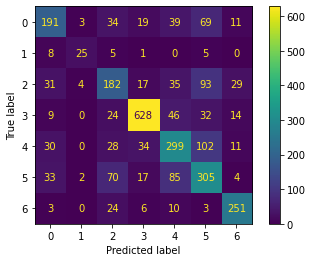

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

pred = model.predict(X_test)
y_pred=np.argmax(pred,axis=1)
rounded_labels=np.argmax(y_test, axis=1)
Confusion_Matrix = confusion_matrix(rounded_labels, y_pred)
Disp = ConfusionMatrixDisplay(Confusion_Matrix)
Disp.plot()
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, f1_score, matthews_corrcoef, log_loss, accuracy_score

y_pred_proba = model.predict(X_test)

ROC_AUC = roc_auc_score(rounded_labels, y_pred_proba, multi_class='ovr')
Cohen_Kappa = cohen_kappa_score(rounded_labels, y_pred)
F1 = f1_score(rounded_labels, y_pred, average='macro')
Matthews = matthews_corrcoef(rounded_labels, y_pred)
Log = log_loss(rounded_labels, y_pred_proba)
Accuracy = accuracy_score(rounded_labels, y_pred)

print('ROC_AUC Score:', ROC_AUC)
print('Cohen_Kappa Score:', Cohen_Kappa)
print('F1 Score:', F1)
print('Matthews Correlation Coefficient:', Matthews)
print('Log Loss:', Log)
print('Accuracy:', Accuracy)       

ROC_AUC Score: 0.9031400602890293
Cohen_Kappa Score: 0.5804126122008642
F1 Score: 0.6407606443382037
Matthews Correlation Coefficient: 0.5810411792173555
Log Loss: 1.785233967759882
Accuracy: 0.6551724137931034


Text(0, 0.5, 'Loss')

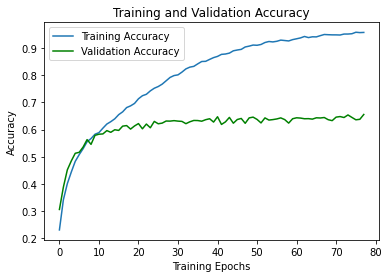

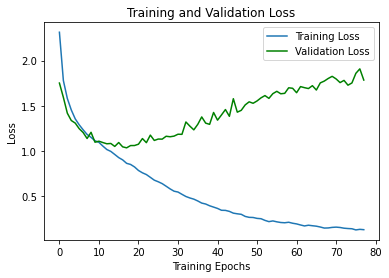

In [52]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = hist.history[     'accuracy' ] + hist2.history[     'accuracy' ] + hist3.history[     'accuracy' ] + hist4.history[     'accuracy' ]
val_acc  = hist.history[ 'val_accuracy' ] + hist2.history[     'val_accuracy' ] + hist3.history[     'val_accuracy' ] + hist4.history[     'val_accuracy' ]
loss     = hist.history[    'loss' ] + hist2.history[     'loss' ] + hist3.history[     'loss' ] + hist4.history[     'loss' ]
val_loss = hist.history['val_loss' ] + hist2.history[     'val_loss' ] + hist3.history[     'val_loss' ] + hist4.history[     'val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc, color = 'g')
plt.title ('Training and Validation Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss, color = 'g' )
plt.title ('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Training Epochs')
plt.ylabel('Loss')
